In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/gurgaon_properties_cleaned_v2.csv')
df.drop_duplicates(inplace=True)
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,2.0,NaN,Undefined,NaN,1000.0,NaN,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,0.0,NaN,Relatively New,NaN,NaN,4800.0,1,1,0,0,0,0,119
2,flat,signature global park,sohna road,0.90,8035.0,1120.0,Super Built up area 1120(104.05 sq.m.),3,2,2,2.0,South,Under Construction,1120.0,NaN,NaN,0,0,0,0,0,0,144
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,3.0,East,Relatively New,NaN,1935.0,NaN,0,0,1,0,0,1,75
4,flat,central park flower valley aqua front towers,sector 33,1.70,9502.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3,12.0,NaN,Under Construction,1789.0,NaN,NaN,0,0,0,0,0,0,24


# Price

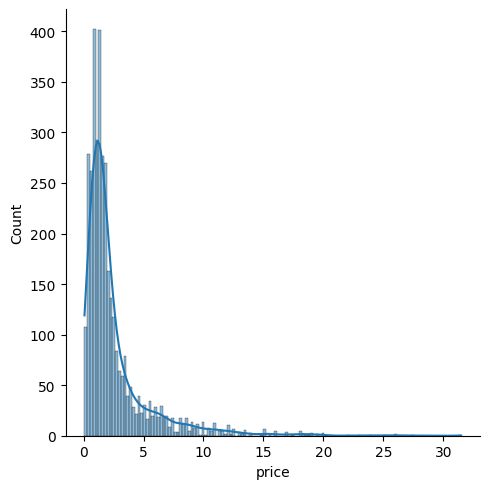

In [ ]:
sns.displot(data=df,x='price',kde=True)

<Axes: xlabel='price'>

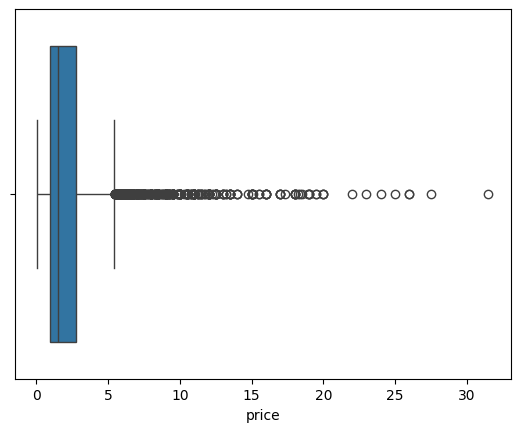

In [ ]:
sns.boxplot(x=df['price'])

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outlier = df[(df['price'] > upper_bound) | (df['price'] < lower_bound)]
num_outlier = outlier.shape[0]
num_outlier

425

In [ ]:
outliers_price_stats = outlier['price'].describe()
outliers_price_stats

,price
count,425.000000
mean,9.235624
std,4.065259
min,5.460000
25%,6.460000
50%,8.000000
75%,10.750000
max,31.500000


In [ ]:
outlier

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
6,house,unitech uniworld resorts,sector 33,11.00,26667.0,4125.0,Plot area 500(418.06 sq.m.),5,6,3,3.0,NaN,New Property,NaN,500.0,NaN,1,1,0,0,0,0,58
12,house,unitech espace,sector 50,11.00,40741.0,2700.0,Plot area 360(301.01 sq.m.)Built Up area: 361 ...,4,4,3+,2.0,North,Moderately Old,NaN,361.0,300.0,0,1,0,0,0,1,88
16,house,ansals palam vihar,sector 2,5.70,14729.0,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550...,5,5,2,2.0,North-East,Old Property,NaN,4550.0,4450.0,0,0,0,1,0,2,94
19,house,independent,sector 26,9.00,33333.0,2700.0,Plot area 300(250.84 sq.m.),5,5,2,3.0,South-West,Old Property,NaN,2700.0,NaN,1,1,1,1,0,2,110
23,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),9,9,3+,3.0,South,Moderately Old,NaN,300.0,NaN,0,1,0,1,1,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,house,emaar mgf marbella,sector 66,19.00,31666.0,6000.0,Plot area 9000(836.13 sq.m.)Carpet area: 6000 ...,5,6,3+,3.0,North-East,Relatively New,NaN,NaN,6000.0,0,1,1,1,0,1,110
3786,flat,dlf the crest,sector 54,11.00,35222.0,3123.0,Super Built up area 3123(290.14 sq.m.),4,6,3,7.0,NaN,Relatively New,3123.0,NaN,NaN,0,1,0,0,0,2,125
3804,house,independent,sector 46,6.81,36911.0,1845.0,Plot area 205(171.41 sq.m.),12,14,3+,NaN,East,New Property,NaN,1845.0,NaN,0,1,0,0,1,1,40
3805,house,housing board colony,sector 28,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,3,3,2.0,North,Old Property,NaN,1800.0,NaN,0,0,0,1,1,1,22


### here all data proint which all are not outlier, some are totally fare by seeing there desciption about property or features

In [ ]:
outlier.sort_values('price',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3256,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.00,NaN,1,1,1,1,0,2,74
3684,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.00,NaN,1,1,0,1,1,1,42
2405,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.00,NaN,1,1,0,1,1,1,138
833,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.00,350.0,1,1,1,1,0,1,72
462,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.00,NaN,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,house,independent,sector 48,5.50,23504.0,2340.0,Plot area 260(217.39 sq.m.),4,4,2,2.0,North,Relatively New,NaN,2340.00,NaN,0,1,0,0,0,1,22
3805,house,housing board colony,sector 28,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,3,3,2.0,North,Old Property,NaN,1800.00,NaN,0,0,0,1,1,1,22
23,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),9,9,3+,3.0,South,Moderately Old,NaN,300.00,NaN,0,1,0,1,1,1,26
1633,flat,experion windchants,sector 112,5.49,11584.0,4739.0,Super Built up area 4739(440.27 sq.m.)Built Up...,4,5,3+,5.0,South,Relatively New,4739.0,3655.35,NaN,0,1,0,0,0,1,168


### price we handle in end ---> becouse i think after maintaing other , price autometically handled

# price_per_sqrt

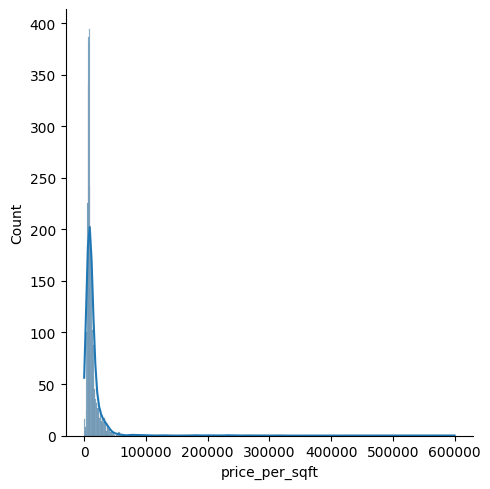

In [ ]:
sns.displot(x=df['price_per_sqft'],kde=True)

### Very high right tailed data

<Axes: xlabel='price_per_sqft'>

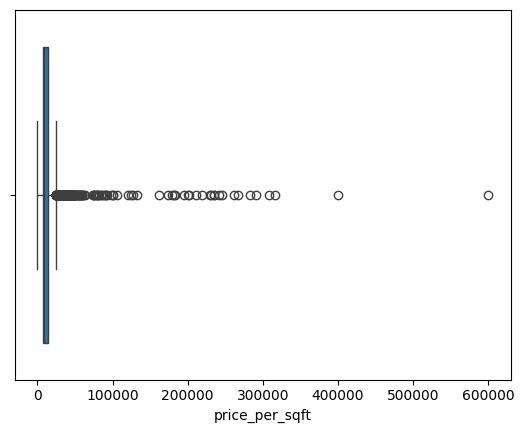

In [ ]:
sns.boxplot(x=df['price_per_sqft'])

In [ ]:
from re import I
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

outlier_sqft = df[(df['price_per_sqft'] > upper_bound) | (df['price_per_sqft'] < lower_bound)]
outlier_sqft

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,3.0,East,Relatively New,NaN,1935.0,NaN,0,0,1,0,0,1,75
6,house,unitech uniworld resorts,sector 33,11.00,26667.0,4125.0,Plot area 500(418.06 sq.m.),5,6,3,3.0,NaN,New Property,NaN,500.0,NaN,1,1,0,0,0,0,58
12,house,unitech espace,sector 50,11.00,40741.0,2700.0,Plot area 360(301.01 sq.m.)Built Up area: 361 ...,4,4,3+,2.0,North,Moderately Old,NaN,361.0,300.0,0,1,0,0,0,1,88
19,house,independent,sector 26,9.00,33333.0,2700.0,Plot area 300(250.84 sq.m.),5,5,2,3.0,South-West,Old Property,NaN,2700.0,NaN,1,1,1,1,0,2,110
23,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),9,9,3+,3.0,South,Moderately Old,NaN,300.0,NaN,0,1,0,1,1,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3786,flat,dlf the crest,sector 54,11.00,35222.0,3123.0,Super Built up area 3123(290.14 sq.m.),4,6,3,7.0,NaN,Relatively New,3123.0,NaN,NaN,0,1,0,0,0,2,125
3791,house,independent,sector 55,3.55,24500.0,1449.0,Plot area 161(134.62 sq.m.),4,4,3+,2.0,NaN,Old Property,NaN,1449.0,NaN,0,0,0,0,0,1,27
3804,house,independent,sector 46,6.81,36911.0,1845.0,Plot area 205(171.41 sq.m.),12,14,3+,NaN,East,New Property,NaN,1845.0,NaN,0,1,0,0,1,1,40
3805,house,housing board colony,sector 28,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,3,3,2.0,North,Old Property,NaN,1800.0,NaN,0,0,0,1,1,1,22


In [ ]:
outlier_sqft['price_per_sqft'].describe()

,price_per_sqft
count,355.000000
mean,52655.732394
std,61075.606424
min,24489.000000
25%,28216.500000
50%,33404.000000
75%,42043.000000
max,600000.000000


In [ ]:
outlier_sqft.sort_values('price_per_sqft',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1580,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
90,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,1,114
980,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0
2043,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53
2685,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,0,1,1,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730,flat,dlf the belaire,sector 54,10.00,24557.0,4072.0,Super Built up area 4072(378.3 sq.m.)Built Up ...,4,5,3+,17.0,North,Moderately Old,4072.0,3000.0,2800.0,0,1,0,0,0,2,167
322,house,independent,sector 46,2.25,24510.0,918.0,Plot area 102(85.28 sq.m.)Built Up area: 90 sq...,4,3,3,3.0,North-East,Relatively New,NaN,90.0,85.0,1,0,0,0,0,1,35
1898,house,independent,sector 46,3.55,24500.0,1449.0,Plot area 161(134.62 sq.m.),5,4,3+,3.0,North-West,Moderately Old,NaN,1449.0,NaN,0,1,0,0,0,1,73
3791,house,independent,sector 55,3.55,24500.0,1449.0,Plot area 161(134.62 sq.m.),4,4,3+,2.0,NaN,Old Property,NaN,1449.0,NaN,0,0,0,0,0,1,27


### one more problem --> some data points are still in different scale ( not in sqft )  hence multiply by 9

price_per_sqft	--> area
* 600000.0 ---> 400.0
* 400000.0 ---> 250.0

In [ ]:
outlier_sqft['area'] = outlier_sqft['area'].apply(lambda x:x*9 if x< 1000 else x)

<ipython-input-16-4035748922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft['area'] = outlier_sqft['area'].apply(lambda x:x*9 if x< 1000 else x)


In [ ]:
outlier_sqft['price_per_sqft'] = round((outlier_sqft['price']*10000000)/outlier_sqft['area'])
outlier_sqft['price_per_sqft'].describe()

<ipython-input-17-4054898881>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft['price_per_sqft'] = round((outlier_sqft['price']*10000000)/outlier_sqft['area'])


,price_per_sqft
count,355.000000
mean,29298.681690
std,12435.713201
min,2723.000000
25%,25559.000000
50%,29861.000000
75%,35543.000000
max,82540.000000


In [ ]:
df.update(outlier_sqft)

### now graph is better than previous

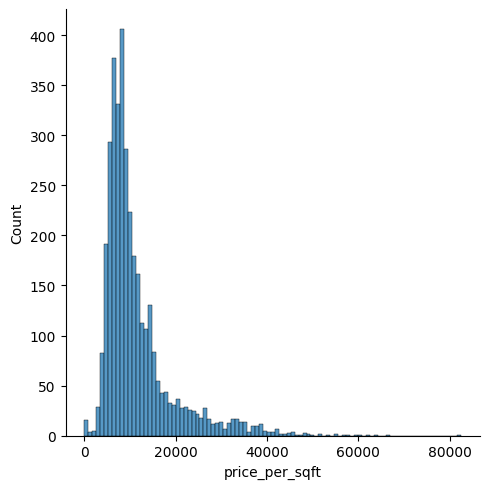

In [ ]:
sns.displot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

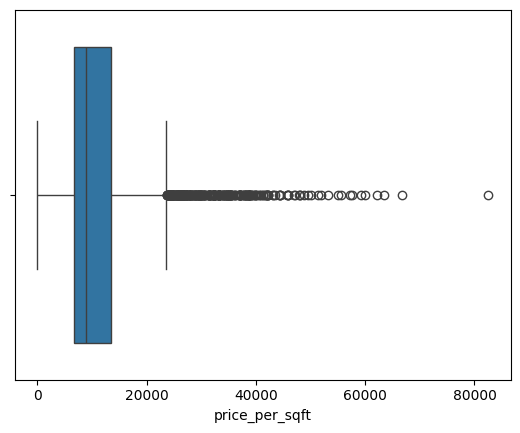

In [ ]:
sns.boxplot(x=df['price_per_sqft'])

In [ ]:
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
155,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
578,house,cloudnine cottages,sohna road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
586,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
637,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
833,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
1074,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,1,72
1580,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1711,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
1978,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
2041,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75


### consider these 13 data points as outlier

In [ ]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

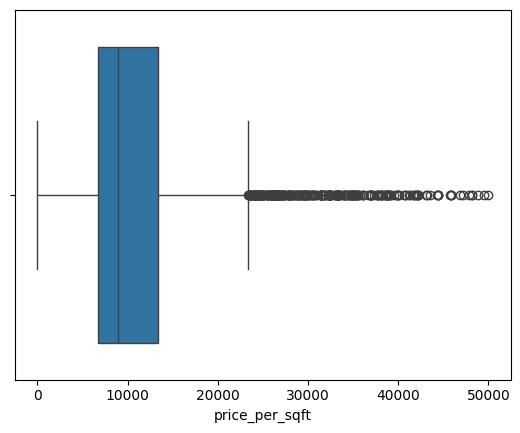

In [ ]:
sns.boxplot(x=df['price_per_sqft'])

# Area

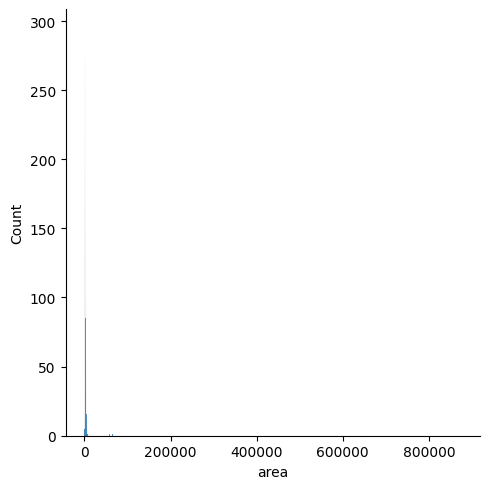

In [ ]:
sns.displot(df['area'])

<Axes: xlabel='area'>

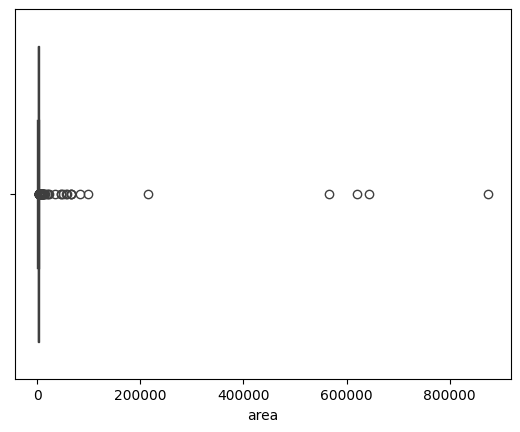

In [ ]:
sns.boxplot(x=df['area'])

In [ ]:
df['area'].describe()

,area
count,3650.000000
mean,2946.300822
std,23198.710586
min,145.000000
25%,1262.000000
50%,1750.000000
75%,2348.500000
max,875000.000000


In [ ]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
69,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
552,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1263,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
1531,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
3112,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0


In [ ]:
df = df[df['area'] < 100000]

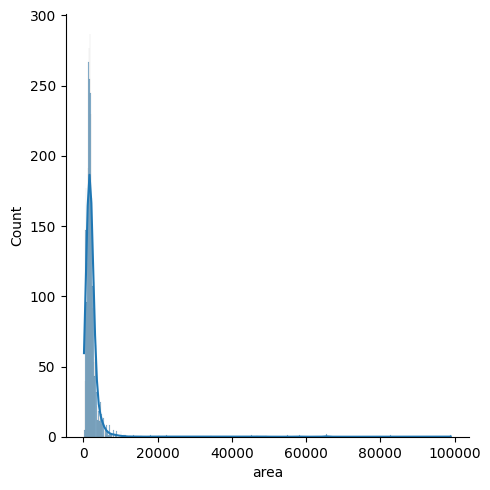

In [ ]:
sns.displot(df['area'],kde=True)

<Axes: xlabel='area'>

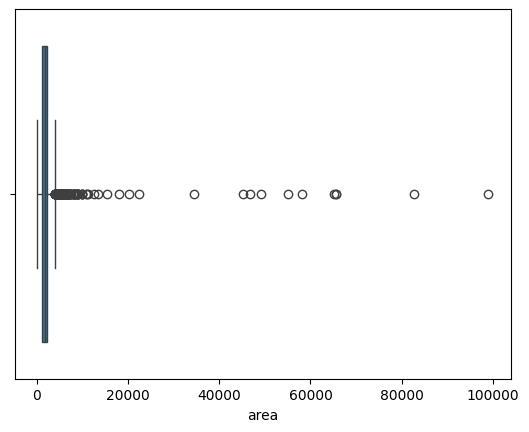

In [ ]:
sns.boxplot(x=df['area'])

In [ ]:
df[df['area'] > 10000].sort_values('area',ascending=False)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
614,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
1645,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1607,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
2767,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
436,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
3117,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
3793,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
1914,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
377,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
704,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


### 614, 1607, 2767,3117, 1914, 704, 3209, 1840
* these data points are not outlier, there are data error
* becouse no. of bedroom, bathroom not matching the total flat area
* hence drop then

In [ ]:
df.drop(index=[614, 1607, 2767,3117,3793, 1914, 704, 3209, 1840],inplace = True)

### remaining rows
### here in some rows---> area is not calculated correctly
* hence recalculate

# area = super_built_up_area ... if is Nan then use built_up_area

In [ ]:
print(df[df['area'] > 10000].sort_values('area',ascending=False).shape)
df[df['area'] > 10000].sort_values('area',ascending=False)

(11, 23)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1645,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
436,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
377,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3591,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
1787,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
529,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
3009,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
1443,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
3684,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
3111,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [ ]:
df.loc[1645,'area'] = 115*9
df.loc[436,'area'] = 7250
df.loc[377,'area'] = 5800
df.loc[3591,'area'] = 2660
df.loc[1787,'area'] = 2850
df.loc[529,'area'] = 1812
df.loc[3009,'area'] = 2160
df.loc[1443,'area'] = 1175

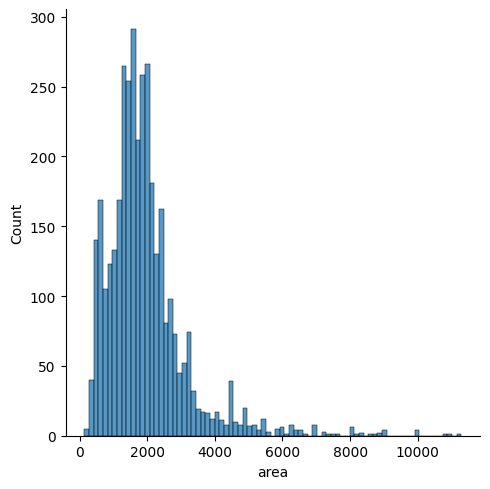

In [ ]:
sns.displot(df['area'])

<Axes: xlabel='area'>

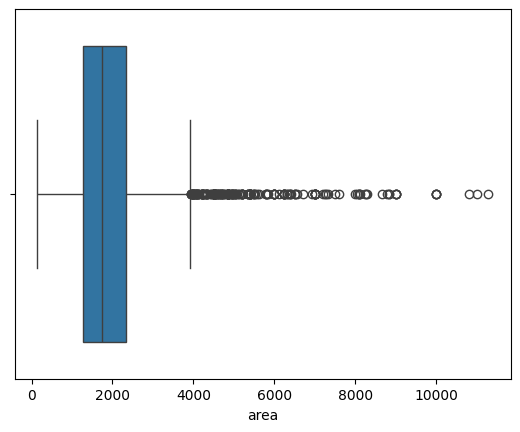

In [ ]:
sns.boxplot(x=df['area'])

In [ ]:

df['area'].describe()

,area
count,3636.000000
mean,1949.751650
std,1215.496418
min,145.000000
25%,1260.000000
50%,1746.500000
75%,2325.000000
max,11286.000000


# Bedroom

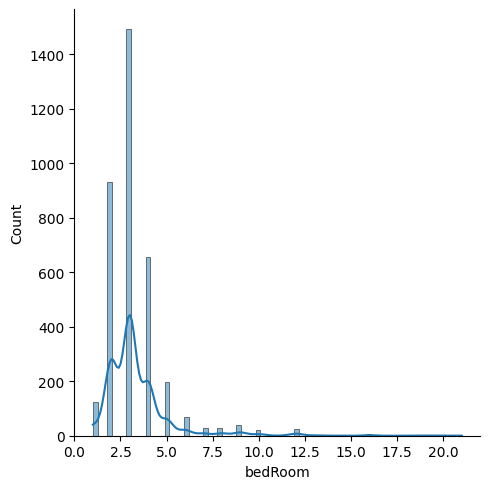

In [ ]:
sns.displot(df['bedRoom'],kde=True)

<Axes: xlabel='bedRoom'>

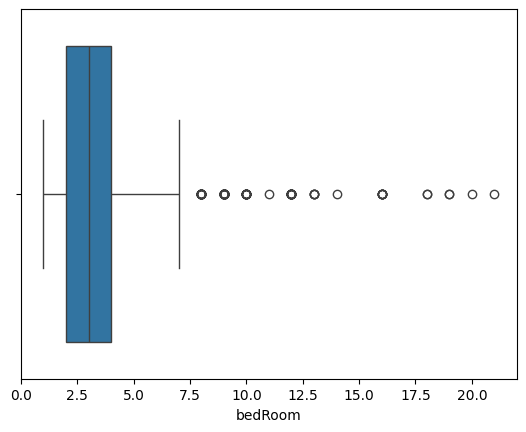

In [ ]:
sns.boxplot(x=df['bedRoom'])

In [ ]:
df['bedRoom'].describe()

,bedRoom
count,3636.000000
mean,3.335809
std,1.832833
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,21.000000


In [ ]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False).shape

(45, 23)

In [ ]:
df = df[df['bedRoom'] <= 10]

In [ ]:
df.shape

(3591, 23)

<ipython-input-54-36262191>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

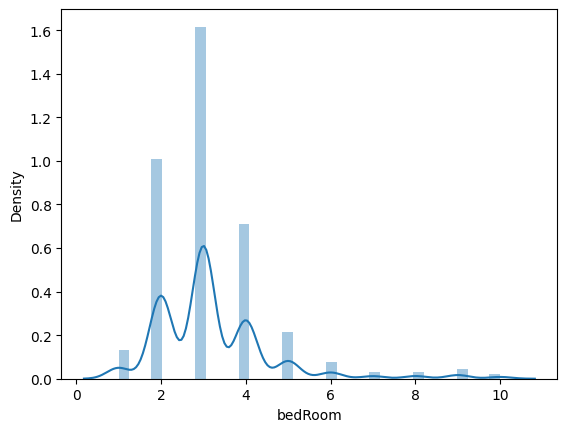

In [ ]:

sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

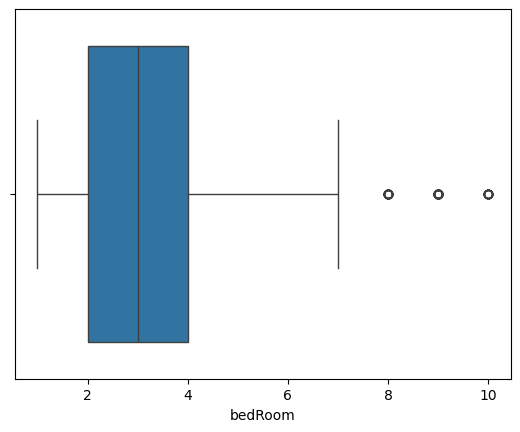

In [ ]:
sns.boxplot(x=df['bedRoom'])

In [ ]:
df['bedRoom'].describe()

,bedRoom
count,3591.000000
mean,3.206071
std,1.398318
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


# Bathroom

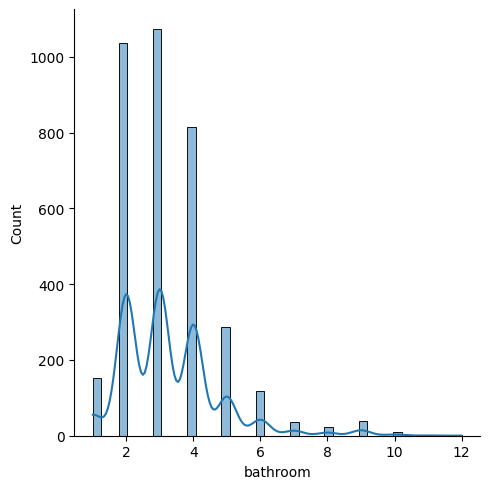

In [ ]:
sns.displot(df['bathroom'],kde=True)

<Axes: xlabel='bathroom'>

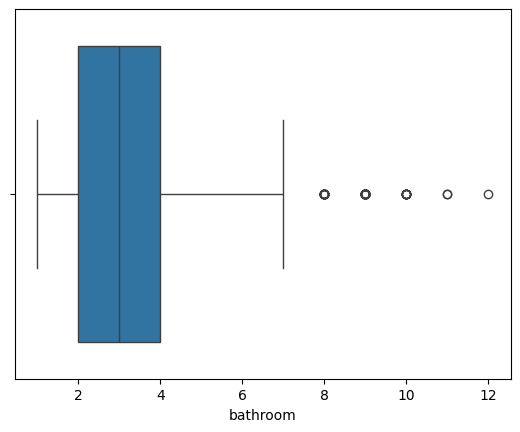

In [ ]:
sns.boxplot(x=df['bathroom'])

In [ ]:
df['bathroom'].describe()

,bathroom
count,3591.000000
mean,3.274854
std,1.458977
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [ ]:
df[df['bathroom'] > 10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
767,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,1,38
864,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39
1996,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146


# super built up area

<Axes: xlabel='super_built_up_area', ylabel='Density'>

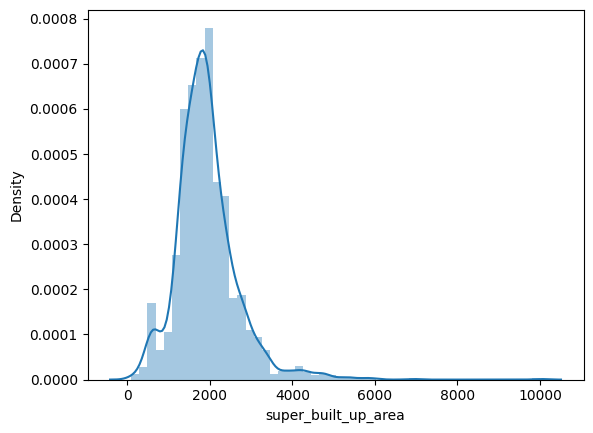

In [ ]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

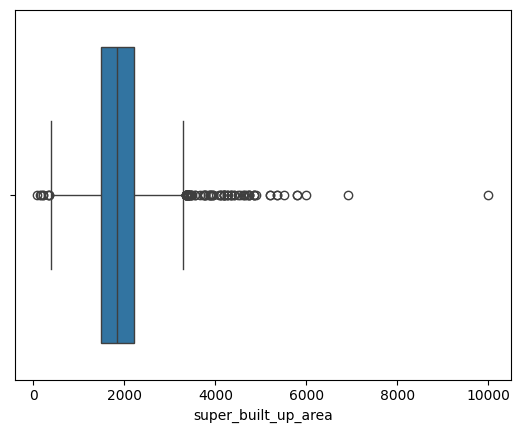

In [ ]:
sns.boxplot(x=df['super_built_up_area'])

In [ ]:

df['super_built_up_area'].describe()

,super_built_up_area
count,1875.000000
mean,1925.237627
std,764.172177
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


### not error, its actual a property, price justifies

In [ ]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
811,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49
2890,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140


# built up area

<Axes: xlabel='built_up_area', ylabel='Density'>

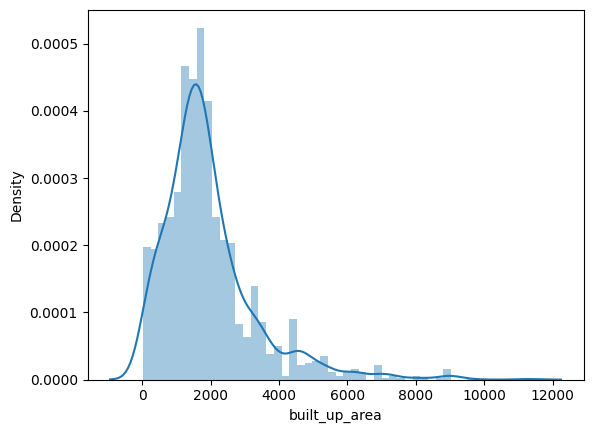

In [ ]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

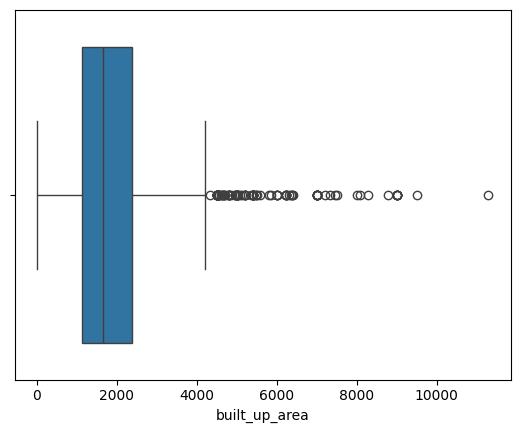

In [ ]:
sns.boxplot(x=df['built_up_area'])

In [ ]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3684,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


# carpet area

<Axes: xlabel='carpet_area', ylabel='Density'>

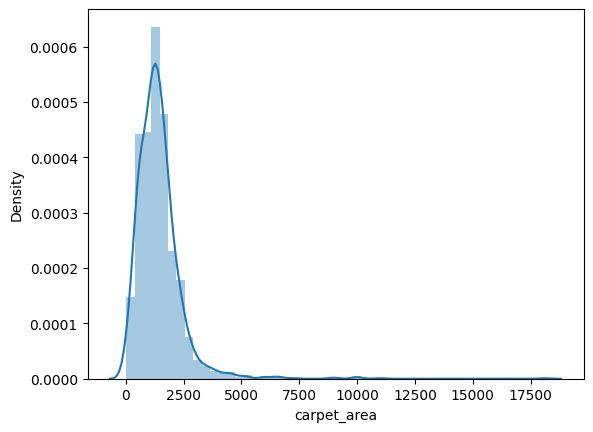

In [ ]:
sns.distplot(df['carpet_area'])

In [ ]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
529,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
3111,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


### by some error in index 529, total area = 1812 but carpet area = 18122

In [ ]:
df.loc[529,'carpet_area'] = 1812

<Axes: xlabel='carpet_area'>

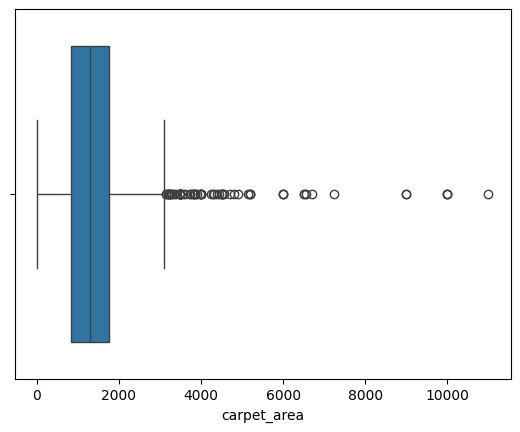

In [ ]:
sns.boxplot(x=df['carpet_area'])

In [ ]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3111,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


#luxury score

<Axes: xlabel='luxury_score', ylabel='Density'>

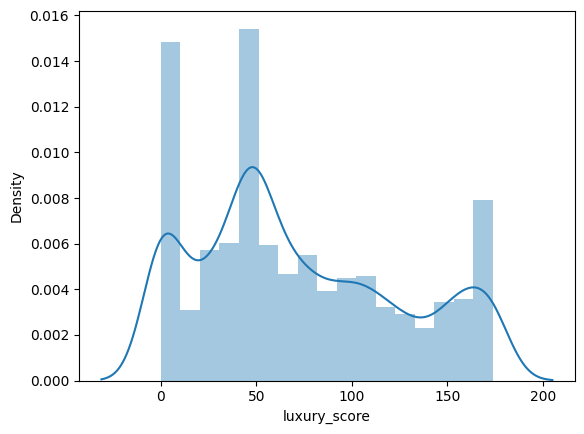

In [ ]:

sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

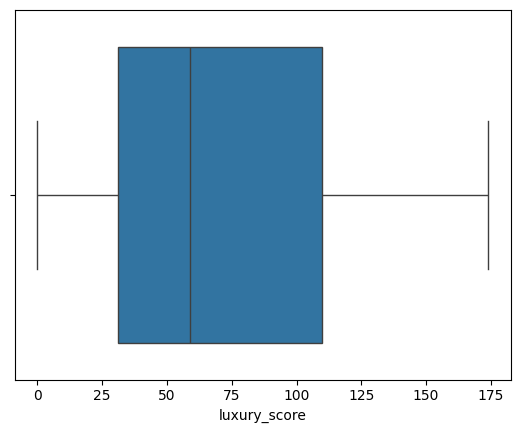

In [ ]:
sns.boxplot(x=df['luxury_score'])

In [ ]:
df.describe()

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
count,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3574.000000,1875.000000,1617.000000,1849.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000
mean,2.425901,11247.113060,1943.154275,3.206071,3.274854,6.862339,1925.237627,1935.232547,1424.751691,0.186021,0.355333,0.089390,0.171818,0.107212,0.381231,71.778613
std,2.774559,7072.126409,1213.540085,1.398318,1.458977,6.056185,764.172177,1397.731328,967.104900,0.389177,0.478681,0.285346,0.377275,0.309426,0.582257,53.255842
min,0.070000,151.000000,145.000000,1.000000,1.000000,0.000000,89.000000,14.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.950000,6737.000000,1258.500000,2.000000,2.000000,2.000000,1479.500000,1120.000000,845.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
50%,1.500000,8888.000000,1743.000000,3.000000,3.000000,5.000000,1828.000000,1650.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
75%,2.650000,13244.000000,2310.000000,4.000000,4.000000,10.000000,2215.000000,2385.000000,1765.730000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,110.000000
max,31.500000,49500.000000,11286.000000,10.000000,12.000000,51.000000,10000.000000,11286.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,174.000000


In [ ]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,2.0,NaN,Undefined,NaN,1000.0,NaN,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10417.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,0.0,NaN,Relatively New,NaN,NaN,4800.0,1,1,0,0,0,0,119
2,flat,signature global park,sohna road,0.90,8036.0,1120.0,Super Built up area 1120(104.05 sq.m.),3,2,2,2.0,South,Under Construction,1120.0,NaN,NaN,0,0,0,0,0,0,144
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,3.0,East,Relatively New,NaN,1935.0,NaN,0,0,1,0,0,1,75
4,flat,central park flower valley aqua front towers,sector 33,1.70,9503.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3,12.0,NaN,Under Construction,1789.0,NaN,NaN,0,0,0,0,0,0,24


<ipython-input-85-2186227091>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

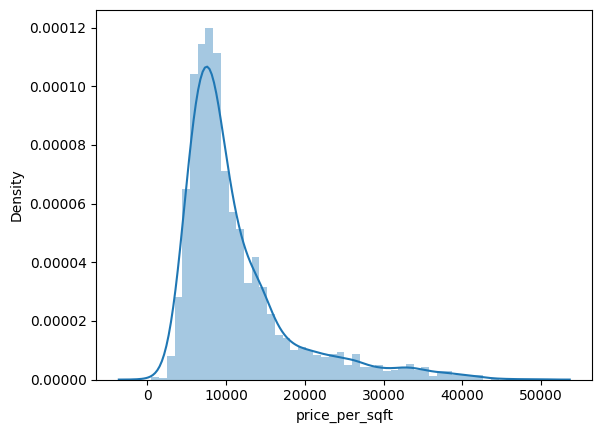

In [ ]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

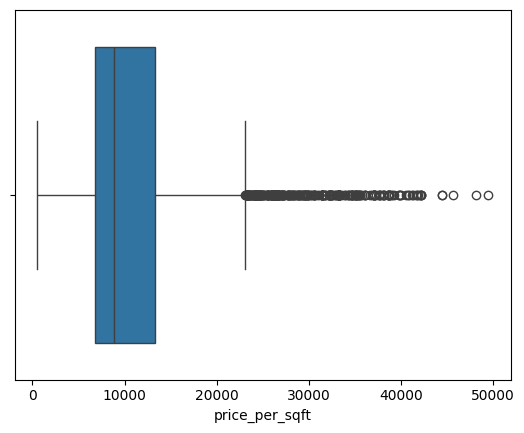

In [ ]:
sns.boxplot(x = df['price_per_sqft'])

In [ ]:
main = df[df['price_per_sqft'] < 20000]

(main['area'] / main['bedRoom']).quantile(0.05)

np.float64(250.0)

# area analysis

### the minimum area required for one bedRoom is 250sqft
* step1--- first drop those row in which <100 area me house bna hai.. data error
* step2--- also drop those in which, room made in < 250 area
* step3--- one more reason for area less and bedRoom more is-----> Room must be devide in floors, the info is given that 9 room are availble and house is of 3 floors
* step4--- also update room_bedroom_ration..... becuase jo bedrooms floors me devide the, unme se hamne sirf 1 floor ke room consider kiye hai
* step5--- now drop those rows in which still values are not explain their value


In [ ]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
953,house,huda ashok vihar phase,sector 4,0.70,10234.0,684.0,Plot area 684(63.55 sq.m.),3,2,1,2.0,North-East,New Property,NaN,684.0,NaN,1,0,0,0,0,0,7
1228,house,independent,sector 28,0.70,8102.0,864.0,Plot area 864(80.27 sq.m.),4,2,0,2.0,North,Old Property,NaN,864.0,NaN,0,0,0,0,0,0,7
2387,flat,signature global solera,sector 107,0.28,5833.0,480.0,Carpet area: 489 (45.43 sq.m.),2,2,2,11.0,South,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45
859,flat,pivotal devaan,sector 84,0.35,7277.0,481.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,10.0,West,Relatively New,583.0,NaN,481.0,0,0,1,0,0,0,103
3278,flat,prime habitat,sector 99a,0.27,5433.0,497.0,Carpet area: 497 (46.17 sq.m.),2,2,1,4.0,North-East,New Property,NaN,NaN,497.0,0,0,0,0,0,0,7


<Axes: xlabel='area', ylabel='bedRoom'>

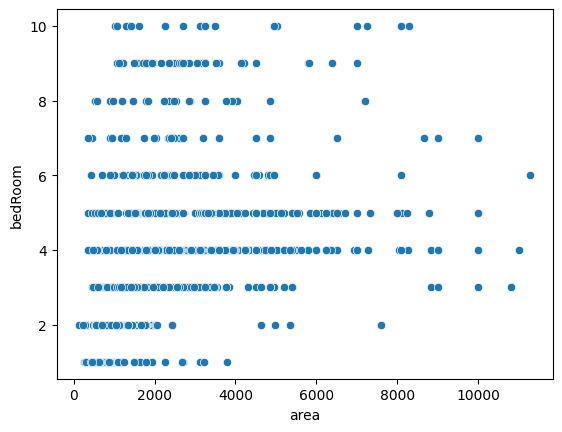

In [ ]:
sns.scatterplot(data=df, x='area', y='bedRoom')

In [ ]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [ ]:
df.sort_values('area_room_ratio')

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1645,house,ganpati heights apartment,sector 13,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7,103.500000
2058,house,independent,sohna road,0.95,8920.0,1065.0,Plot area 1065(98.94 sq.m.),10,10,3+,3.0,NaN,New Property,NaN,1065.0,NaN,0,0,0,0,0,0,0,106.500000
2702,house,independent,sector 4,0.50,9259.0,540.0,Plot area 540(50.17 sq.m.),5,3,2,3.0,West,Old Property,NaN,540.0,NaN,0,0,0,0,0,0,0,108.000000
3613,house,independent,sector 7,0.27,12000.0,225.0,Plot area 225(20.9 sq.m.),2,2,1,2.0,North-East,Moderately Old,NaN,225.0,NaN,0,0,0,0,0,0,12,112.500000
685,house,housing board colony,sector 28,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),8,8,3+,4.0,South-East,Moderately Old,NaN,900.0,NaN,0,0,0,0,1,1,38,112.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,flat,ramsons kshitij,sector 95,0.19,591.0,3215.0,Carpet area: 3212 (298.4 sq.m.),1,1,1,14.0,East,Relatively New,NaN,NaN,3212.0,0,0,0,0,0,0,49,3215.000000
1063,house,independent,sector 25,8.00,8000.0,10000.0,Carpet area: 10000 (929.03 sq.m.),3,9,2,3.0,NaN,New Property,NaN,NaN,10000.0,0,0,0,0,0,0,0,3333.333333
2558,house,independent,sohna road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3,3,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1,1,0,1,1,0,49,3599.666667
28,house,independent,sector 3,3.50,9211.0,3800.0,Built Up area: 3800 (353.03 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,3800.0,NaN,0,0,0,0,0,0,0,3800.000000


In [ ]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

,count
bedRoom,
2,47
3,33
5,28
4,18
6,17
9,16
8,12
7,9
10,8


### first drop those row in which <100 area me house bna hai.. data error

In [ ]:
df = df[df['area_room_ratio'] > 100]

### also drop those in which, room made in < 250 area

In [ ]:
outlier_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

### one more reason for area less and bedRoom more is-----> Room must be devide in floors, the info is given that 9 room are availble and house is of 3 floors

In [ ]:
outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])

In [ ]:
df.update(outlier_df)

### also update room_bedroom_ration..... becuase jo bedrooms floors me devide the, unme se hamne sirf 1 floor ke room consider kiye hai

In [ ]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [ ]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
21,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
56,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.000000
87,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
420,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
512,house,independent,sheetla colony,1.65,8333.0,1980.0,Built Up area: 220 (20.44 sq.m.),9,9,0,1.0,NaN,New Property,NaN,220.0,NaN,0,0,0,0,0,0,0,220.000000
1993,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
2549,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
2788,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
2803,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
2813,house,independent,sector 67,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667


### now drop those rows in which still values are not explain their value

In [ ]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

<Axes: xlabel='area', ylabel='bedRoom'>

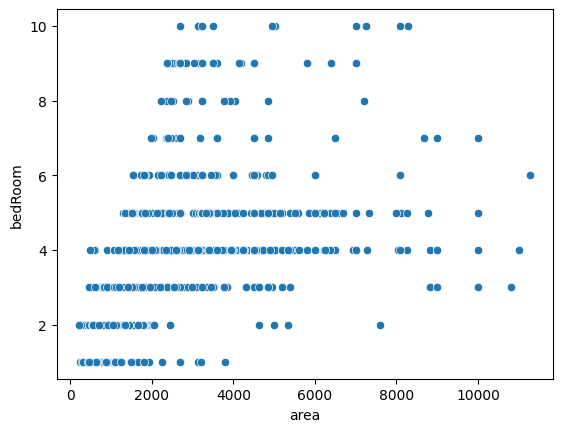

In [ ]:
sns.scatterplot(data=df, x='area',y='bedRoom')

In [ ]:
df.head(

)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,2.0,NaN,Undefined,NaN,1000.0,NaN,0,0,0,0,0,0,0,333.333333
1,flat,tulip ivory,sector 70,5.00,10417.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,0.0,NaN,Relatively New,NaN,NaN,4800.0,1,1,0,0,0,0,119,800.000000
2,flat,signature global park,sohna road,0.90,8036.0,1120.0,Super Built up area 1120(104.05 sq.m.),3,2,2,2.0,South,Under Construction,1120.0,NaN,NaN,0,0,0,0,0,0,144,373.333333
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),3,9,3+,3.0,East,Relatively New,NaN,1935.0,NaN,0,0,1,0,0,1,75,645.000000
4,flat,central park flower valley aqua front towers,sector 33,1.70,9503.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3,12.0,NaN,Under Construction,1789.0,NaN,NaN,0,0,0,0,0,0,24,596.333333


In [ ]:
df.to_csv('gurgaon_properties_outlier_removed.csv',index=False)